# pyspark for Data Exploration 

* Data exploration
  *  Show column details
  * Display rows
  * Number of rows in dataframe
  * Display specific columns
  * Describing the columns
  * Distinct values for Categorical columns
  * Aggregate with Groupby
  * Counting and Removing Null values
  * Save to file

## Connecting drive to colab

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading data from drive

In [5]:
!unzip "/content/drive/MyDrive/BlackFridaySale.zip"

Archive:  /content/drive/MyDrive/BlackFridaySale.zip
  inflating: test.csv                
  inflating: train.csv               


In [6]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()

# Check Spark Session Information
spark

In [8]:
train = spark.read.format("csv").option("header", "true").option("mode", "FAILFAST").option("inferSchema", "true").load("train.csv")
test = spark.read.format("csv").option("header", "true").option("mode", "FAILFAST").option("inferSchema", "true").load("test.csv")

# Show column details

In [9]:
train.printSchema()

root
 |-- User_ID: integer (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Occupation: integer (nullable = true)
 |-- City_Category: string (nullable = true)
 |-- Stay_In_Current_City_Years: string (nullable = true)
 |-- Marital_Status: integer (nullable = true)
 |-- Product_Category_1: integer (nullable = true)
 |-- Product_Category_2: integer (nullable = true)
 |-- Product_Category_3: integer (nullable = true)
 |-- Purchase: integer (nullable = true)



# Display rows

In [10]:
train.show(5)

+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender| Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+----+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|1000001| P00069042|     F|0-17|        10|            A|                         2|             0|                 3|              null|              null|    8370|
|1000001| P00248942|     F|0-17|        10|            A|                         2|             0|                 1|                 6|                14|   15200|
|1000001| P00087842|     F|0-17|        10|            A|                         2|             0|                12|              null|              null|    1422|
|100

# Number of rows in DF

In [11]:
train.count()

550068

# Display specific columns

In [12]:
train.select("User_ID","Gender","Age","Occupation").show()

+-------+------+-----+----------+
|User_ID|Gender|  Age|Occupation|
+-------+------+-----+----------+
|1000001|     F| 0-17|        10|
|1000001|     F| 0-17|        10|
|1000001|     F| 0-17|        10|
|1000001|     F| 0-17|        10|
|1000002|     M|  55+|        16|
|1000003|     M|26-35|        15|
|1000004|     M|46-50|         7|
|1000004|     M|46-50|         7|
|1000004|     M|46-50|         7|
|1000005|     M|26-35|        20|
|1000005|     M|26-35|        20|
|1000005|     M|26-35|        20|
|1000005|     M|26-35|        20|
|1000005|     M|26-35|        20|
|1000006|     F|51-55|         9|
|1000006|     F|51-55|         9|
|1000006|     F|51-55|         9|
|1000006|     F|51-55|         9|
|1000007|     M|36-45|         1|
|1000008|     M|26-35|        12|
+-------+------+-----+----------+
only showing top 20 rows



# Describing the columns

In [13]:
train.describe().show()

+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|summary|           User_ID|Product_ID|Gender|   Age|       Occupation|City_Category|Stay_In_Current_City_Years|     Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|         Purchase|
+-------+------------------+----------+------+------+-----------------+-------------+--------------------------+-------------------+------------------+------------------+------------------+-----------------+
|  count|            550068|    550068|550068|550068|           550068|       550068|                    550068|             550068|            550068|            376430|            166821|           550068|
|   mean|1003028.8424013031|      null|  null|  null|8.076706879876669|         null|         1.468494139793958|0.40965298835780306| 5.404270017525106| 9.84232925112238

# Display distinct values

In [14]:
train.select("City_Category").distinct().show()

+-------------+
|City_Category|
+-------------+
|            B|
|            C|
|            A|
+-------------+



# Aggregate with Groupby

In [15]:
from pyspark.sql import functions as F
train.groupBy("City_Category").agg(F.sum("Purchase").alias('Purchase Sum')).show()

+-------------+------------+
|City_Category|Purchase Sum|
+-------------+------------+
|            B|  2115533605|
|            C|  1663807476|
|            A|  1316471661|
+-------------+------------+



# Counting and Removing Null values

In [17]:
train.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in train.columns]).show()

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|            173638|            383247|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



# Fill na values

In [18]:
train = train.fillna({'Product_Category_2':0, 'Product_Category_3':0})

### Recheck for the null values

In [19]:
train.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in train.columns]).show()

+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|User_ID|Product_ID|Gender|Age|Occupation|City_Category|Stay_In_Current_City_Years|Marital_Status|Product_Category_1|Product_Category_2|Product_Category_3|Purchase|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+
|      0|         0|     0|  0|         0|            0|                         0|             0|                 0|                 0|                 0|       0|
+-------+----------+------+---+----------+-------------+--------------------------+--------------+------------------+------------------+------------------+--------+



In [20]:
print('There are {} rows in the train dataset and {} rows in the test data frame', train.count(),test.count())

There are {} rows in the train dataset and {} rows in the test data frame 550068 233599


# Visualization

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

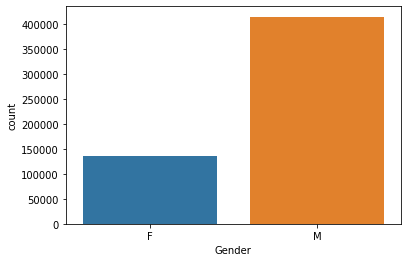

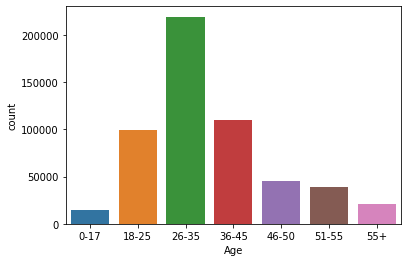

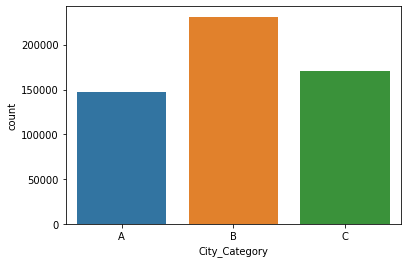

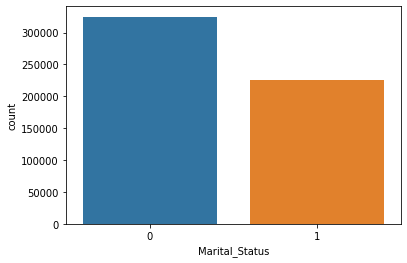

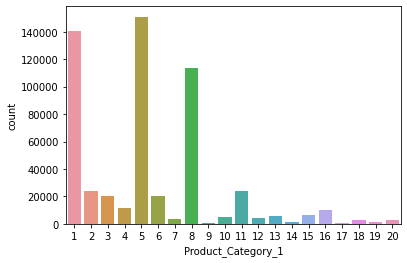

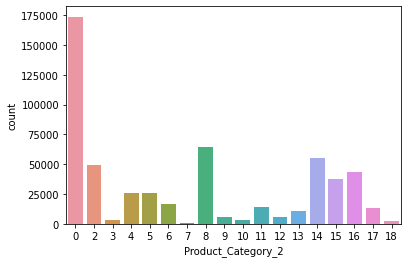

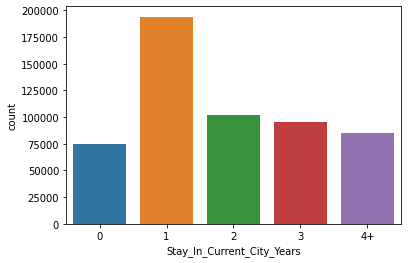

In [22]:
to_plot = ['Gender', 'Age', 'City_Category', 'Marital_Status', 
           'Product_Category_1','Product_Category_2', 'Stay_In_Current_City_Years']
for category in to_plot:
    temp_df = train.groupby(category).count().sort(category).toPandas()
    _ = sns.barplot(x = category, y = 'count', data = temp_df)
    plt.show()

#Save to file

In [27]:
# Spark df to Pandas df
train_df = train.toPandas()

# Store result
train_df.to_csv("/content/drive/MyDrive/pandas_preprocessed_data.csv")

In [28]:
# df.write.csv("/content/drive/MyDrive/preprocessed_BlackFridaySale_data") #Stored as two partitions

In [29]:
# df.rdd.getNumPartitions()